SICA Time Comparison- Additional Tests - Only Compatible with Attempt 2- Only for Time Complexity Calculations for Attempt 2- Only CPU

Part 1: Dataset Generation

Step 1: Import relevant state functions and packages

In [ ]:
from cax_sica.genetic.state import CurrentState as st2

import numpy as np
import jax.numpy as jnp
import time
from typing import List, Tuple

Part 2: Testing Dim/Num Timesteps against Time Required for SICA Simulation: Trial 1: Dim Testing

In [ ]:
#Requires  bit less than 2 hours of runtime.
data: List[Tuple] = []
iter = 6
def generateicsrt(dim, num_steps, example = 0):
    ic = np.random.choice([0,0,0,1], size=(dim, dim))
    srt = np.random.choice([0,0,0,0,0,1], size=(num_steps, dim, dim, 18))
    return ic, srt
for i in range(100, 1010, 10):
    print(f"OPERATING DIM: {i}")
    for _ in range(iter):
        print(f"ITER {_}")
        stepdim = [i,100,0]
        icsrt = generateicsrt(stepdim[0], stepdim[1])
        ic = icsrt[0]
        srt = icsrt[1]
        time_init = time.time()
        state = st2(initial=ic, rules=srt)
        st2res = state.generate()
        data.append((i,time.time()-time_init))




Trial 2: Timestep Testing


In [ ]:
#Requires a little less than an hour of runtime.
data_time: List[Tuple] = []
iter = 6
def generateicsrt(dim, num_steps, example = 0):
    ic = np.random.choice([0,0,0,1], size=(dim, dim))
    srt = np.random.choice([0,0,0,0,0,1], size=(num_steps, dim, dim, 18))
    return ic, srt
for i in range(100, 1010, 10):
    print(f"OPERATING TIMESTEP CT: {i}")
    for _ in range(iter):
        print(f"ITER {_}")
        stepdim = [200,i,0]
        icsrt = generateicsrt(stepdim[0], stepdim[1])
        ic = icsrt[0]
        srt = icsrt[1]
        time_init = time.time()
        state = st2(initial=ic, rules=srt)
        st2res = state.generate()
        data_time.append((i,time.time()-time_init))




Step 3: Report results (Optional, used for data export)

In [ ]:
print(data)
print(data_time)

Part 2: Data Analysis and Plotting

Step 1: Import relevant functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from result1000cpu import data
from result1000cpu import data_time

Step 2: Generate plot arrays

In [2]:
#Adjust these values to be 455 - number of outliers.

dim_x = np.zeros((448))
dim_y = np.zeros((448))
step_x = np.zeros((454))
step_y = np.zeros((454))

#Remove first trials as they are outliers, as well as trial-specific outliers (dim: > 5.5s, step: > 2s)
dim_out = 0
step_out = 0
for i in range(0, len(data)):
    if (i%6):
        if (data[i][1] < 5.5):
            dim_x[i-1-int(np.floor(i/6)) - dim_out] = data[i][0]
            dim_y[i-1-int(np.floor(i/6)) - dim_out] = data[i][1]
        else:
            dim_out += 1
for i in range(0, len(data_time)):
    if (i%6):
        if (data_time[i][1] < 2):
            step_x[i-1-int(np.floor(i/6)) - step_out] = data_time[i][0]
            step_y[i-1-int(np.floor(i/6)) - step_out] = data_time[i][1]
        else:
            step_out += 1


Step 3: Perform test regressions (target: dim: quadratic; timestep: linear) and plot; evaluate using R²

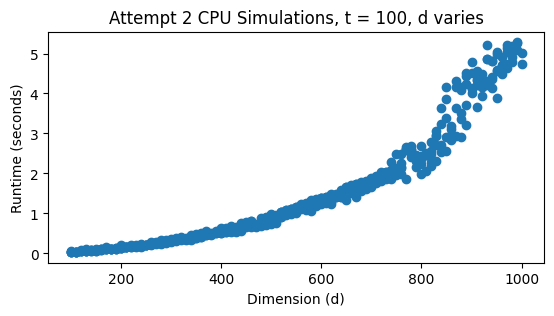

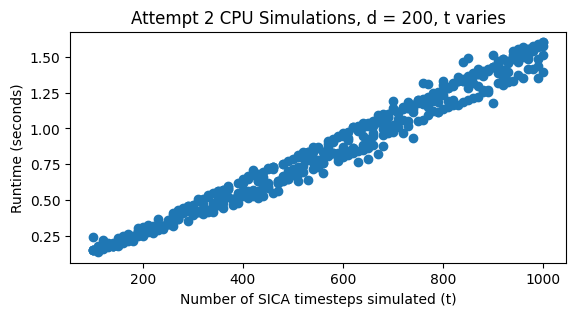

In [3]:
dim = stats.linregress(dim_x, dim_y)
step = stats.linregress(step_x, step_y)

"""Dim plots."""
#O(n²) fit
plt.figure().set_figheight(3)
plt.plot(dim_x, dim_y, 'o')
plt.xlabel(f"Dimension (d)")
plt.ylabel("Runtime (seconds)")
plt.title("Attempt 2 CPU Simulations, t = 100, d varies")
plt.show()

"""Timestep plots."""
#O(n) fit
plt.figure().set_figheight(3)
plt.plot(step_x, step_y, 'o', label='original data')
plt.xlabel(f"Number of SICA timesteps simulated (t)")
plt.ylabel("Runtime (seconds)")
plt.title("Attempt 2 CPU Simulations, d = 200, t varies")
plt.show()